In [1]:
import sys
sys.version


'3.8.10 (default, Nov 22 2023, 10:22:35) \n[GCC 9.4.0]'

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

2024-05-28 11:52:19.314739: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 11:52:20.106545: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-28 11:52:20.106608: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


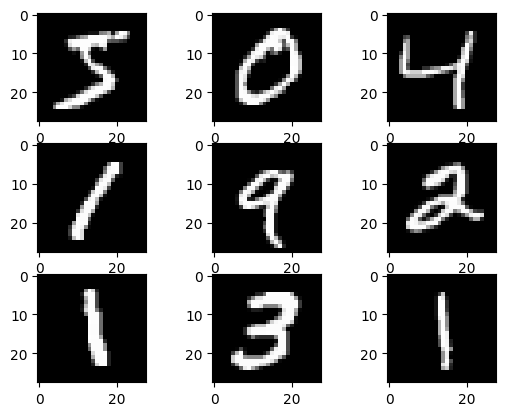

In [5]:
for i in range(9):
    plt.subplot(330 + 1 + i) #A number of rows in the grid, B = number of columns in the grid, C =index of the subplot within the grid
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show

In [6]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils

In [7]:
# flatten the images 28X28 to a vector by 784. THis is needed because our NN only accepts a 1D Vector
#Total num of pixels = height * width
num_pixels = X_train.shape[1] * X_train.shape[2]

#Reshape all images into 784 1D
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
#Normalize the input data, scaling them in a range from 0-1
#Leads to better efficieny in by having a smaller input range
X_train = X_train / 255
X_test = X_test / 255

In [9]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
# define baseline model
def baseline_model():
    #We create a linear stack of layers in keras using the Sequential class. 
    #Each layer has exactly one input and output tensor
    model = Sequential()
    #Fully connected layer, input dim == num of pixels, kernerl_initializer WEIGHT = normal
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    #Adding A the output layer, softmax activation to converts raw score into probabilities.
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Creating the Loss function in the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10


2024-05-28 11:52:22.302715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: /usr/lib/x86_64-linux-gnu/libcuda.so.1: file too short; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-28 11:52:22.302731: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


300/300 - 2s - loss: 0.2809 - accuracy: 0.9200 - val_loss: 0.1461 - val_accuracy: 0.9576 - 2s/epoch - 6ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1131 - accuracy: 0.9675 - val_loss: 0.0947 - val_accuracy: 0.9714 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0725 - accuracy: 0.9793 - val_loss: 0.0805 - val_accuracy: 0.9749 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0518 - accuracy: 0.9850 - val_loss: 0.0813 - val_accuracy: 0.9732 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0367 - accuracy: 0.9895 - val_loss: 0.0654 - val_accuracy: 0.9801 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0276 - accuracy: 0.9928 - val_loss: 0.0639 - val_accuracy: 0.9800 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0193 - accuracy: 0.9953 - val_loss: 0.0624 - val_accuracy: 0.9806 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0151 - accuracy: 0.9966 - val_loss: 0.0636 - val_accuracy: 0.9817 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s - loss: 0.0

In [12]:
import numpy as np
predictions = model.predict(X_test)
#Returns an np array with each row corresponding to the predicted probabilities.
predicted_labels = np.argmax(predictions, axis = 1) #Return maximum value for each prediction, for each row
actual_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 0s 1ms/step


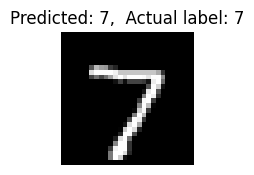

In [13]:
plt.figure(figsize=(10,10))
for i in range(1):
    plt.subplot(5,5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]},  Actual label: {actual_labels[i]}")
    plt.axis('off')
plt.show()

In [14]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import shap


4/4 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

9532/9532 [==============================] - 9s 973us/step
(1, 784)


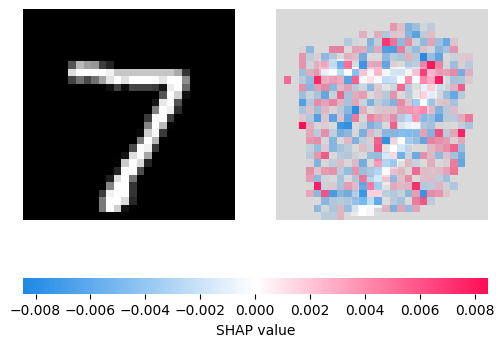

In [28]:
import numpy as np
import shap

# Assuming the model and data are defined
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Using a subset of the training data
shap_values = explainer.shap_values(X_test[:1])  # Explain the predictions for the first test image

# Print the shape of the SHAP values
print(shap_values[0].shape)  # Should print (1, 784)

# Reshape the SHAP values to (28, 28, 1)
reshaped_shap_values = np.reshape(shap_values[0], (1, 28, 28, 1))

# Reshape the test image to (1, 28, 28, 1) as well
reshaped_test_image = X_test[:1].reshape((1, 28, 28, 1))

# Plot the SHAP values for the first test image
shap.image_plot(reshaped_shap_values, reshaped_test_image)


4/4 [==============================] - 0s 1ms/step


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


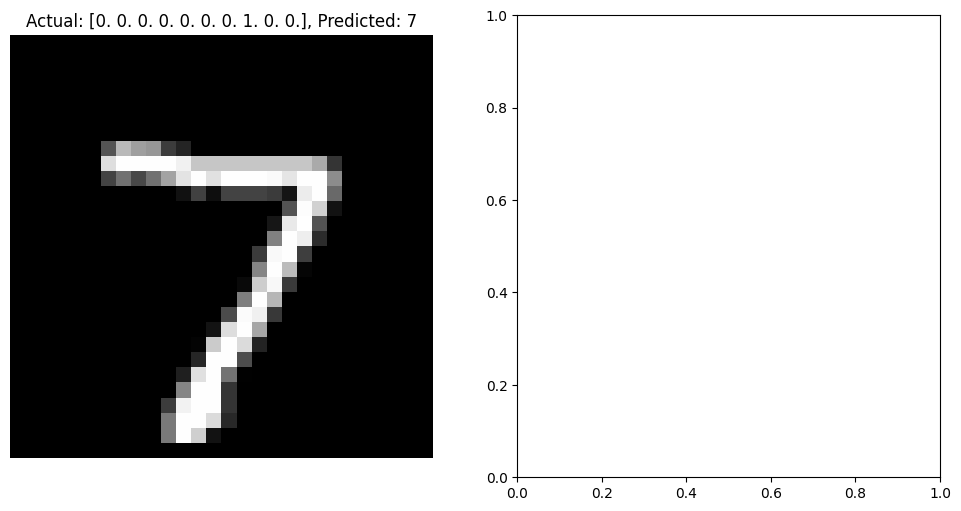

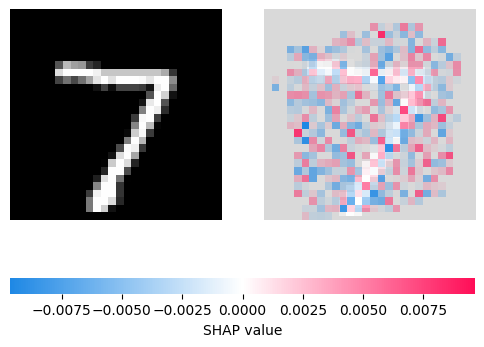

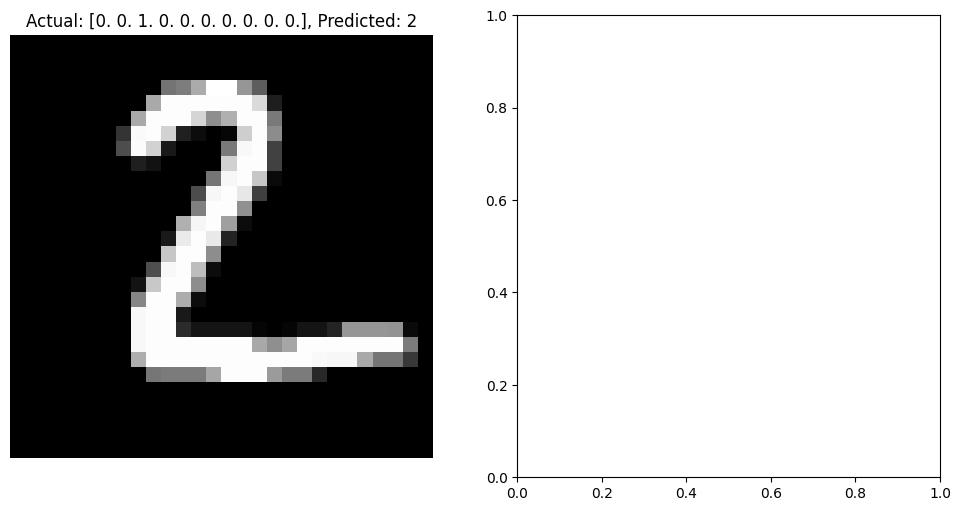

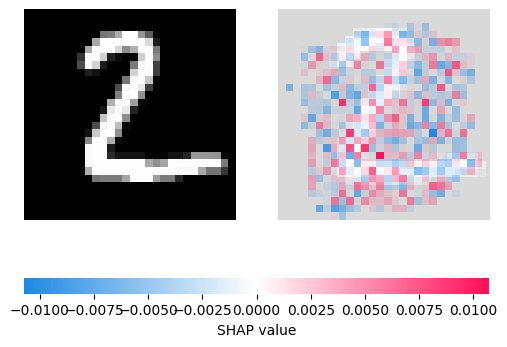

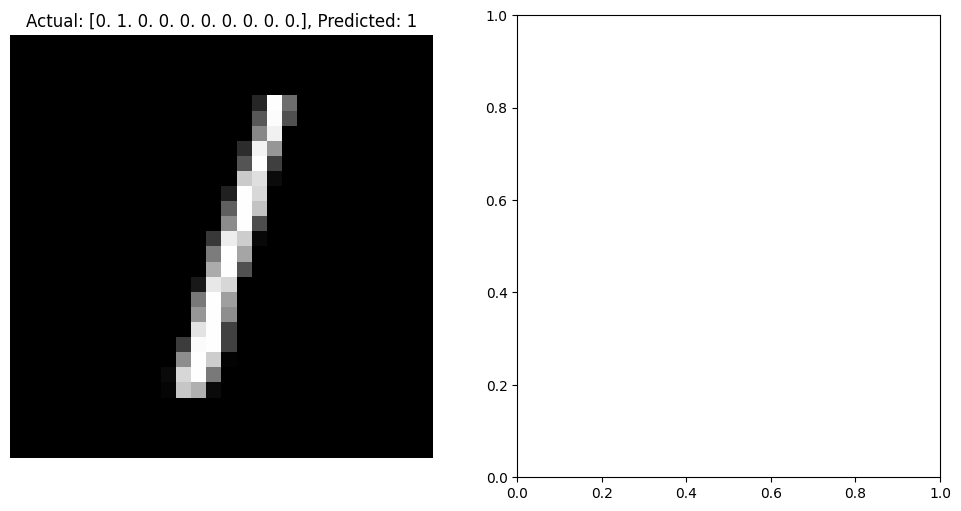

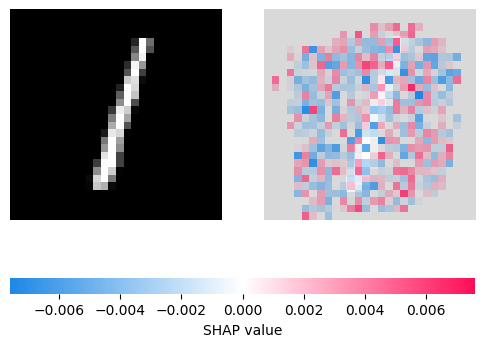

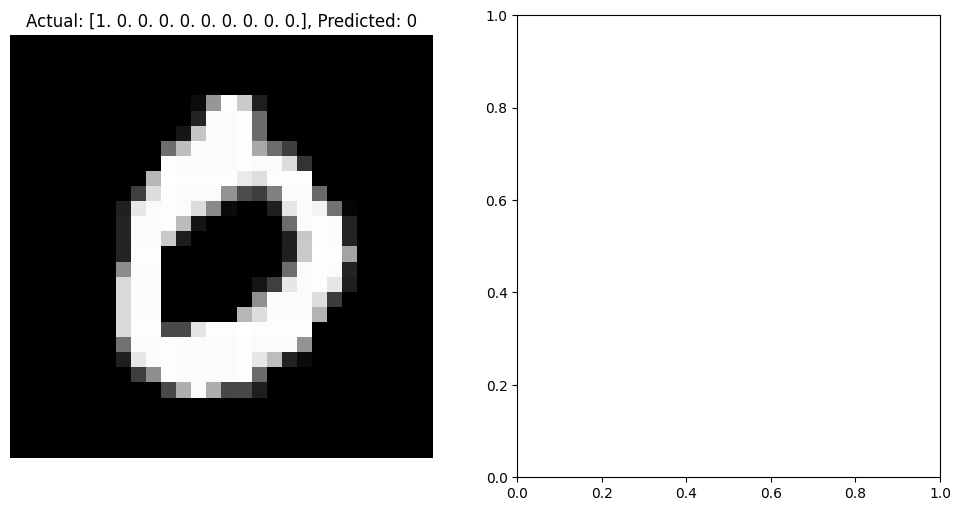

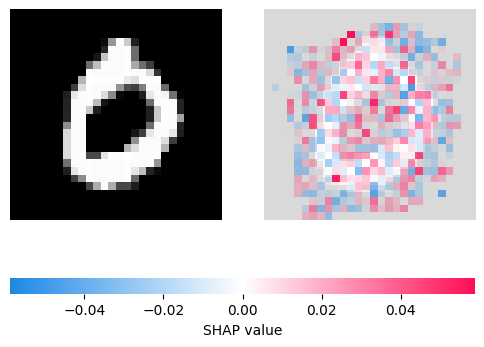

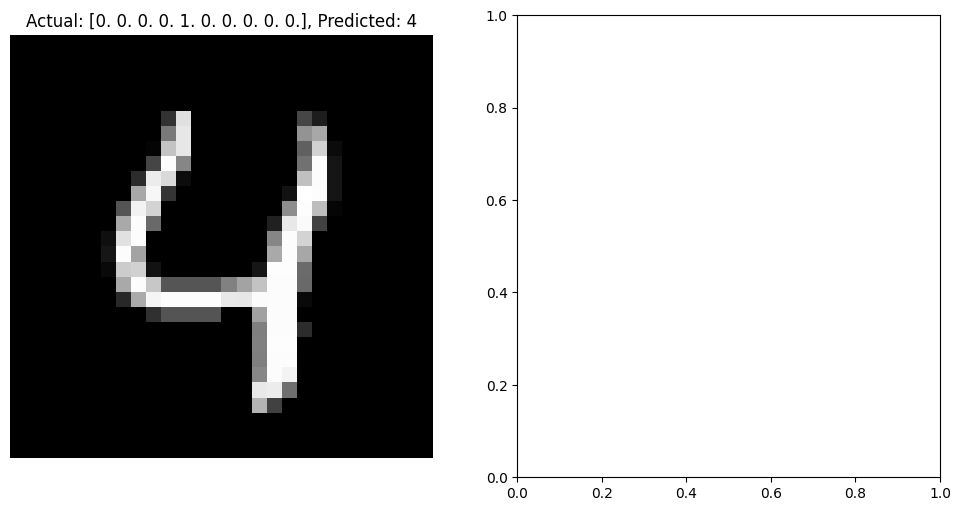

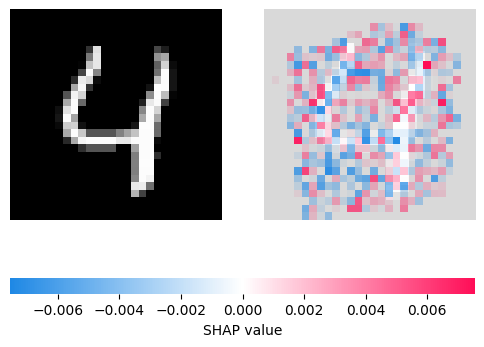

In [32]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Assuming the model and data are defined
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Using a subset of the training data
shap_values = explainer.shap_values(X_test[:5])  # Explain the predictions for the first 5 test images

# Reshape the SHAP values to (5, 28, 28, 1)
reshaped_shap_values = np.reshape(shap_values[0], (5, 28, 28, 1))

# Reshape the test images to (5, 28, 28, 1) as well
reshaped_test_images = X_test[:5].reshape((5, 28, 28, 1))

# Predict labels for the first 5 test images
predicted_labels = model.predict(X_test[:5])
predicted_labels = np.argmax(predicted_labels, axis=1)  # Assuming the model's output is a probability distribution

# Get the actual labels for the first 5 test images
actual_labels = y_test[:5]

# Plot the SHAP values along with actual and predicted labels
for i in range(5):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the original image
    ax[0].imshow(reshaped_test_images[i].squeeze(), cmap='gray')
    ax[0].set_title(f'Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}')
    ax[0].axis('off')
    
    # Plot the SHAP values
    shap.image_plot(reshaped_shap_values[i:i+1], reshaped_test_images[i:i+1])
    ax[1].imshow(reshaped_shap_values[i].squeeze(), cmap='hot', interpolation='nearest')
    ax[1].set_title(f'SHAP values for image {i+1}')
    ax[1].axis('off')
    
    plt.show()

